In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco-Customer.csv")
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Convert Churn to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Cleaned Data Shape:", df.shape)

Cleaned Data Shape: (7032, 21)


In [5]:
churn_rate = df['Churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.58%


Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn, dtype: float64


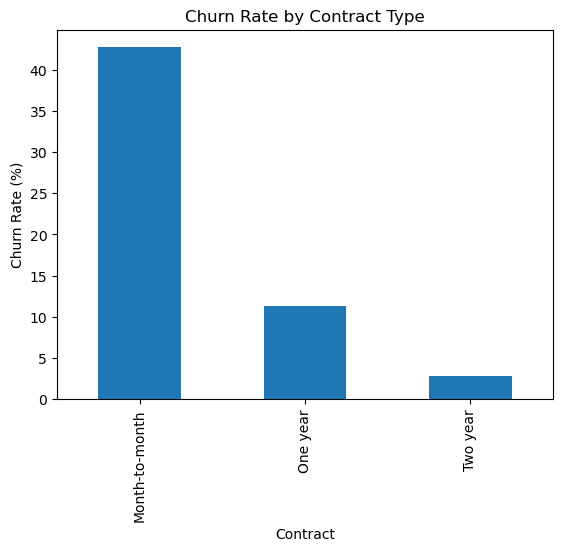

In [6]:
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
print(contract_churn)

contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()

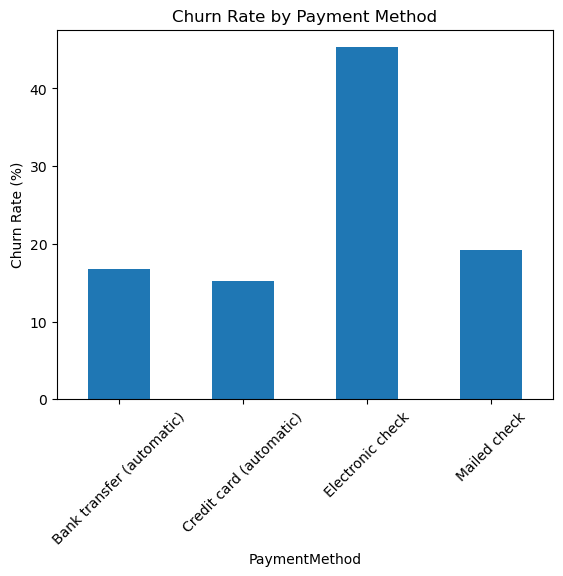

In [7]:
payment_churn = df.groupby('PaymentMethod')['Churn'].mean() * 100

payment_churn.plot(kind='bar')
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [8]:
tenure_analysis = df.groupby('Churn')['tenure'].mean()
print("Average Tenure:")
print(tenure_analysis)

Average Tenure:
Churn
0    37.650010
1    17.979133
Name: tenure, dtype: float64


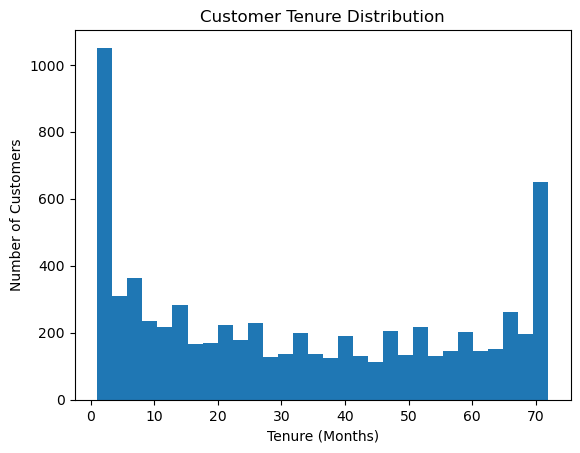

In [9]:
plt.hist(df['tenure'], bins=30)
plt.title("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

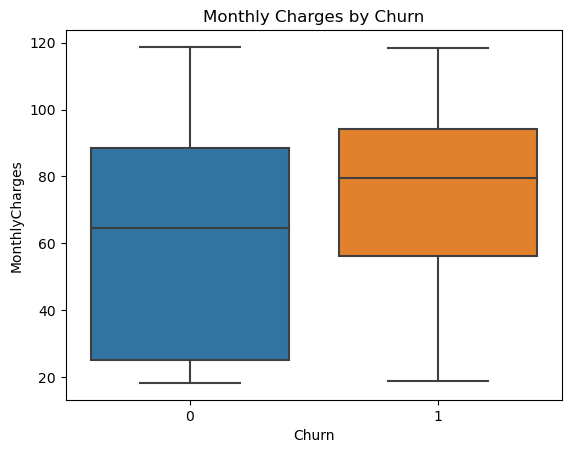

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

In [11]:
senior_churn = df.groupby('SeniorCitizen')['Churn'].mean() * 100
print(senior_churn)

SeniorCitizen
0    23.650255
1    41.681261
Name: Churn, dtype: float64


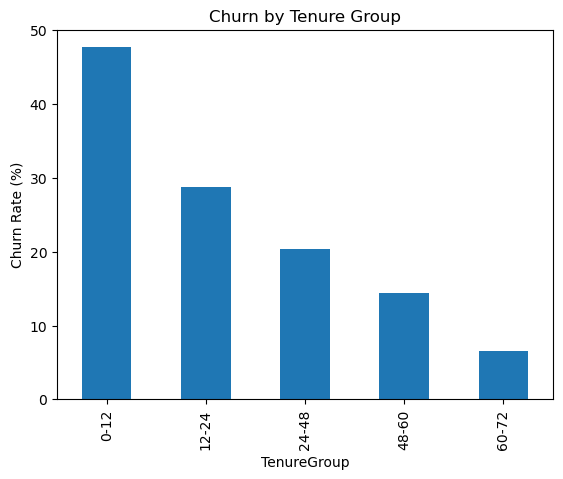

In [12]:
df['TenureGroup'] = pd.cut(df['tenure'],
                           bins=[0,12,24,48,60,72],
                           labels=['0-12','12-24','24-48','48-60','60-72'])

tenure_group_churn = df.groupby('TenureGroup')['Churn'].mean() * 100

tenure_group_churn.plot(kind='bar')
plt.title("Churn by Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()

In [13]:
summary = {
    "Total Customers": len(df),
    "Churn Rate (%)": churn_rate,
    "Avg Tenure (All)": df['tenure'].mean(),
    "Avg Monthly Charges": df['MonthlyCharges'].mean()
}

summary_df = pd.DataFrame(summary, index=[0])
summary_df.to_csv("churn_summary.csv", index=False)

print("Summary saved successfully!")

Summary saved successfully!
